In [1]:
import geopandas as gpd

In [2]:
xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, ymin, xmax, ymax)

In [3]:
cropfield = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)

In [4]:
cropfield.type

0        Polygon
1        Polygon
2        Polygon
3        Polygon
4        Polygon
          ...   
22026    Polygon
22027    Polygon
22028    Polygon
22029    Polygon
22030    Polygon
Length: 22031, dtype: object

In [5]:
cropfield.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [6]:
cropfield.total_bounds

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

In [8]:
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)
cropfield_crop = cropfield.cx[xmin:xmax, ymin:ymax]

In [9]:
cropfield_crop.total_bounds

array([119594.384   , 484949.292625, 135375.77025 , 500782.531   ])

In [10]:
cropfield_crop.to_file("cropped_field.shp")

<AxesSubplot: >

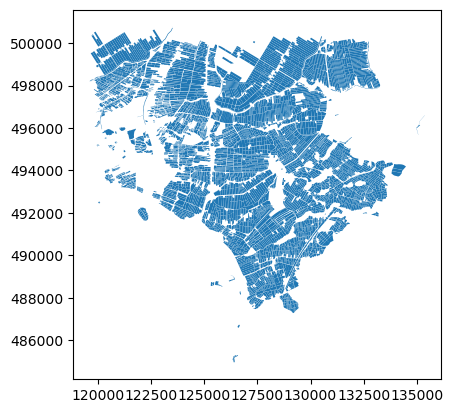

In [11]:
cropfield_crop.plot()

<AxesSubplot: >

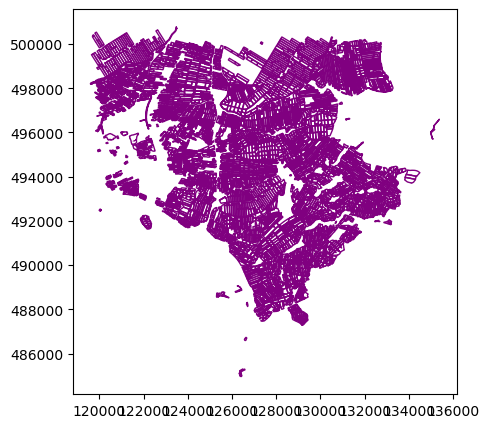

In [12]:
cropfield_crop.plot(figsize=(5, 5), edgecolor="purple", facecolor="None")

In [13]:
# Challenge: Import Line and Point Vector Datasets
waterways_nl = gpd.read_file("data/status_vaarweg.zip")
wells_nl = gpd.read_file("data/brogmwvolledigeset.zip")

In [26]:
print(set([t for t in waterways_nl.type]))
print(set([t for t in wells_nl.type]))
print()
# 1. Lines are present in waterways_nl. Points are present in wells_nl.

print(waterways_nl.crs)
print(waterways_nl.total_bounds)
print(wells_nl.crs)
print(wells_nl.total_bounds)
print()
# 2. CRS and total extent above

print(len(waterways_nl))
print(len(wells_nl))
# 3. 91 features in waterways and 54,659 in wells

{'LineString'}
{'Point', None}

epsg:4326
[50.7916  3.1626 53.6161  7.0121]
epsg:4258
[ 3.37982412 50.75590464  7.21010667 53.49457587]

91
54659


<AxesSubplot: >

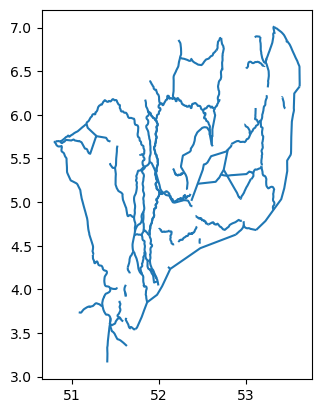

In [28]:
# Challenge: Investigate the waterway lines

waterways_nl.plot()

# The issue is that the x axis should be longitude and the y axis should be latitude, but the plot has x as latitude and y as longitude

In [29]:
waterways_nl["geometry"]

0     LINESTRING (52.41810 4.84060, 52.42070 4.84090...
1     LINESTRING (52.11910 4.67450, 52.11930 4.67340...
2     LINESTRING (52.10090 4.25730, 52.10390 4.25530...
3     LINESTRING (53.47250 6.84550, 53.47740 6.83840...
4     LINESTRING (52.32270 5.14300, 52.32100 5.14640...
                            ...                        
86    LINESTRING (51.49270 5.39100, 51.48050 5.39160...
87    LINESTRING (52.15900 5.38510, 52.16010 5.38340...
88    LINESTRING (51.97340 4.12420, 51.97110 4.12220...
89    LINESTRING (52.11910 4.67450, 52.11850 4.67430...
90    LINESTRING (51.88940 4.61900, 51.89040 4.61350...
Name: geometry, Length: 91, dtype: geometry

In [31]:
print(waterways_nl["geometry"][2])
print(type(waterways_nl["geometry"][2]))

LINESTRING (52.100900002 4.25730000099998, 52.1039 4.25529999999998, 52.111299999 4.24929999900002, 52.1274 4.23449999799999)
<class 'shapely.geometry.linestring.LineString'>


In [32]:
import shapely

def flip(geometry):
    return shapely.ops.transform(lambda x, y: (y, x), geometry)

geom_corrected = waterways_nl["geometry"].apply(flip)

<AxesSubplot: >

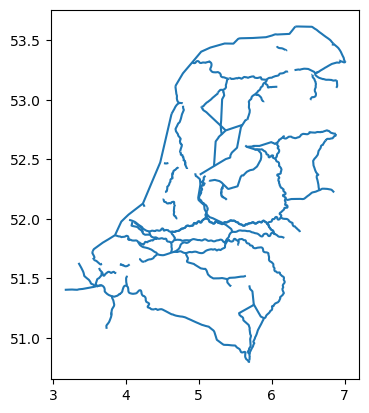

In [33]:
waterways_nl["geometry"] = geom_corrected
waterways_nl.plot()

In [34]:
waterways_nl.to_file("waterways_nl_corrected.shp")